# Name: ARIS VENITIA FERNANDES

## Sparks Foundation @GRIP February 2023

### Task 4 : Exploratory Data Analysis - Terrorism

## Objective:
• Perform 'Exploratory Data Analysis' on dataset Global Terrorism'

• As a security/defense analyst, try to find out the hot zone of terrorism.

• What all security issues and insights you can derive by EDA?

## DATA PREPROCESSING

In [1]:
import math
import warnings
import numpy as np # Linear algebra
import pandas as pd # data processing
import seaborn as sns 
import plotly.offline as py 
import plotly.graph_objs as go 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [2]:
Data_Set = pd.read_csv('GlobalTerrorism.csv')

In [3]:
#retrive first 5 records
Data_Set.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
Data_Set.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
# renaming columns for better understanding 
Data_Set.rename(columns= {'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country': 'Country_No','country_txt':'Country',
                          'provstate':'State','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude',
                          'attacktype1_txt': 'Attack Type', 'target1': 'Target', 'nkill': 'Killed', 'nwound': 'Wounded', 
                          'summary':'Summary', 'gname': 'Group', 'targtype1_txt':'Target Type', 'weaptype1_txt':'Weapon Type', 
                          'motive': 'Motive'}, inplace=True)

In [6]:
Data_Set.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'Country_No', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
#selecting the desired and important columns from the data set 
Data_Set = Data_Set[['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City', 'Latitude', 'Longitude', 'Attack Type', 'Killed', 
                  'Wounded', 'Target', 'Summary', 'Group', 'Target Type', 'Weapon Type', 'Motive']]

In [8]:
Data_Set.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack Type,Killed,Wounded,Target,Summary,Group,Target Type,Weapon Type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
Data_Set.isnull().sum()  #to check for null values

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
Attack Type         0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target Type         0
Weapon Type         0
Motive         131130
dtype: int64

In [10]:
Data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attack Type  181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target Type  181691 non-null  object 
 16  Weapon Type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

## UNDERSTANDING THE DATA

In [11]:
print('Country with the most attacks: ', Data_Set['Country'].value_counts().idxmax())
print('City with the most attacks: ', Data_Set['City'].value_counts().index[1]) 
print('Region with the most attacks: ', Data_Set['Region'].value_counts().idxmax())
print('Year with the most attacks: ', Data_Set['Year'].value_counts().idxmax())
print('Month with the most attacks: ', Data_Set['Month'].value_counts().idxmax())
print('Group with the most attacks: ', Data_Set['Group'].value_counts().index[1])
print('Most Attack Types: ', Data_Set['Attack Type'].value_counts().idxmax())

Country with the most attacks:  Iraq
City with the most attacks:  Baghdad
Region with the most attacks:  Middle East & North Africa
Year with the most attacks:  2014
Month with the most attacks:  5
Group with the most attacks:  Taliban
Most Attack Types:  Bombing/Explosion


In [12]:
Data_Set['Year'].value_counts(dropna = False).sort_index().head(10)

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
Name: Year, dtype: int64

## DATA VISUALISATION

#### Number of Terrorist Activities Every Year

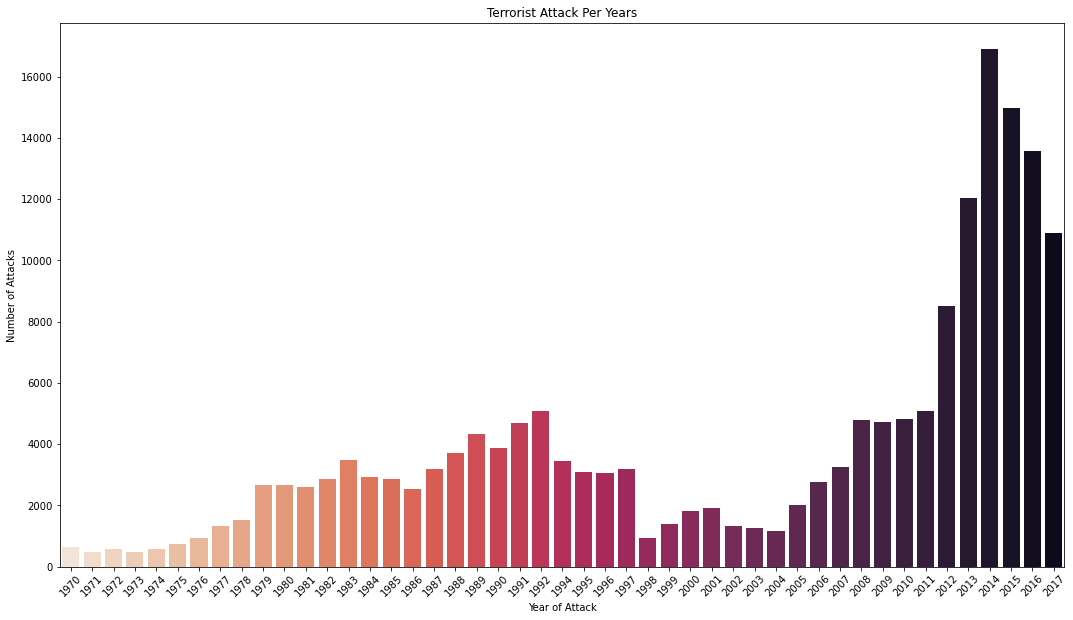

In [13]:
year = Data_Set['Year'].unique()
year_count = Data_Set['Year'].value_counts(dropna = False).sort_index()

plt.figure(figsize = (18,10))

sns.barplot(x = year, y = year_count, data = Data_Set, palette = 'rocket_r')
plt.xticks(rotation = 45)
plt.xlabel('Year of Attack')
plt.ylabel('Number of Attacks')
plt.title('Terrorist Attack Per Years')
plt.show()

#### Understanding the Terrorist Activities by Region in Every Year

#### 1.  (Area Plot)

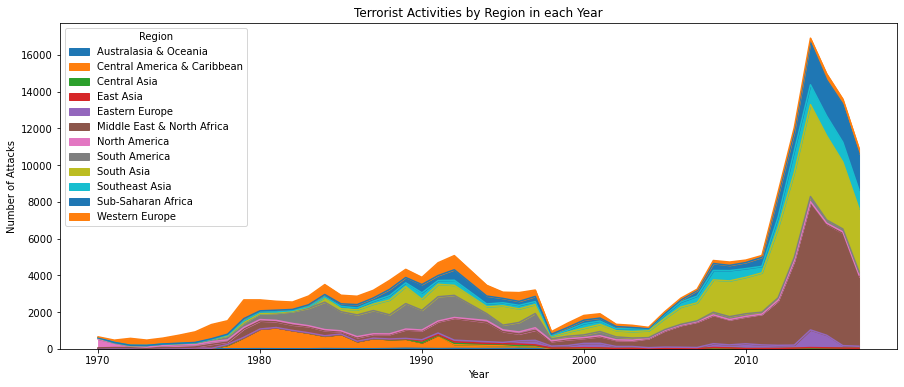

In [14]:
x = Data_Set['Year']
y = Data_Set['Region']
pd.crosstab(x,y).plot(kind='area', figsize=(15,6)) 
plt.title('Terrorist Activities by Region in each Year') 
plt.ylabel('Number of Attacks')
plt.show()

In [15]:
Data_Set['Wounded'] = Data_Set['Wounded'].fillna(0).astype(int)
Data_Set['Killed'] = Data_Set['Killed'].fillna(0).astype(int)
Data_Set['casualities'] = Data_Set['Killed'] + Data_Set['Wounded']

#### 2. (Heat Map)

The top 50 worst terror attacks are selected as to keep the map simple and easy to visualize

In [16]:
Data_Set = Data_Set.sort_values(by='casualities', ascending=False)[:50]

In [17]:
heat = Data_Set.pivot_table(index='Country',columns= 'Year', values='casualities')
heat.fillna(0, inplace=True) 

In [18]:
heat.head()

Year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,...,2005,2006,2007,2008,2009,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0,0.0
Egypt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438.0
Ethiopia,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
py.init_notebook_mode(connected=True)

colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'], [.6, '#8856a7' ], [1, '#810f7c']]
heatmap = go.Heatmap(z = heat.values, x = heat.columns, y = heat.index, colorscale= colorscale)
data = [heatmap]
layout = go. Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks=''))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap', show_link=False)

In [20]:
Data_Set.Country.value_counts()[:15]

Iraq             14
United States     5
Spain             4
Japan             3
Afghanistan       2
Sri Lanka         2
Rwanda            2
Syria             2
Libya             1
Pakistan          1
Algeria           1
Mozambique        1
Ethiopia          1
France            1
Nepal             1
Name: Country, dtype: int64

### Top Countries Affected by the Attacks

#### 3. (Bar Graph)

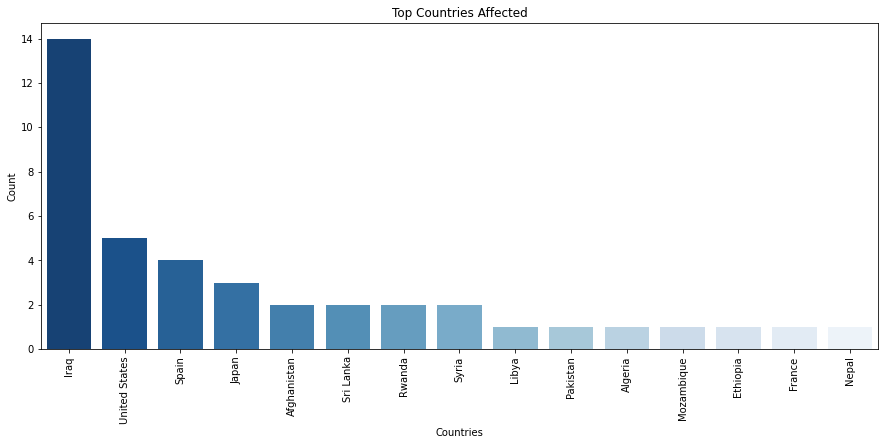

In [21]:
plt.subplots(figsize=(15,6))
sns.barplot(Data_Set['Country'].value_counts()[:15].index,Data_Set['Country'].value_counts()[:15].values, palette= 'Blues_r') 
plt.title('Top Countries Affected') 
plt.xlabel('Countries') 
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## ANALYSIS ON CUSTOMIZED DATA

Terrorist Attacks during a Particular Year and The Locations

In [22]:
import folium
from folium.plugins import MarkerCluster

In [23]:
filterYear = Data_Set['Year'] == 1970

In [24]:
Data = Data_Set[filterYear] # filter data

FilteredData = Data.loc[:, 'City': 'Longitude'] #we are getting the required fields
FilteredData = FilteredData.dropna() # drop NaN values in latitude and longitude
FilteredData_List= FilteredData.values.tolist()

In [25]:
map = folium.Map(location = [0, 30], tiles= 'CartoDB positron', zoom_start = 10)

markercluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(FilteredData_List)):
    folium.Marker(location=[FilteredData_List[point][1],FilteredData_List[point][2]], 
                  popup = FilteredData_List[point][0]).add_to(markerCluster)
map

In 1970, the American continent was the site of 84% of terrorist attacks.
In 1970, the Middle East and North Africa, which are now hotspots for wars and terrorist attacks, experienced only one terrorist attack.

Let us now investigate which terrorist organizations have carried out operations in each country. A value count would reveal the terrorist organizations responsible for the most attacks. We started at 1 to negate the value of 'Unknown.' 

In [26]:
Data_Set.Group.value_counts()[1:15]

Islamic State of Iraq and the Levant (ISIL)      7
Unknown                                          7
Islamic State of Iraq (ISI)                      3
Al-Qaida in Iraq                                 3
Liberation Tigers of Tamil Eelam (LTTE)          2
Anti-Government extremists                       2
Aum Shinri Kyo                                   2
Khorasan Chapter of the Islamic State            2
Hutu extremists                                  2
Mozambique National Resistance Movement (MNR)    1
Ethiopian People's Revolutionary Party           1
Jihadi-inspired extremists                       1
Taliban                                          1
Kata'ib Hezbollah                                1
Name: Group, dtype: int64

In [27]:
Check = Data_Set[Data_Set.Group.isin(['Shining Path (SL)', 'Taliban', 'Islamic State of Iraq and the Levant (ISIL)'])]

In [28]:
Check.Country.unique()

array(['Iraq', 'Afghanistan', 'Syria'], dtype=object)

In [29]:
Terror_Group = Data_Set.dropna(subset=['Latitude', 'Longitude'])

In [30]:
Terror_Group = Terror_Group.drop_duplicates(subset=['Country', 'Group'])

In [31]:
Terrorist_Groups = Data_Set.Group.value_counts()[1:8].index.tolist()
Terror_Group = Terror_Group.loc[Terror_Group.Group.isin(Terrorist_Groups)]
print(Terror_Group.Group.unique())

['Aum Shinri Kyo' 'Islamic State of Iraq and the Levant (ISIL)'
 'Liberation Tigers of Tamil Eelam (LTTE)' 'Al-Qaida in Iraq'
 'Anti-Government extremists' 'Unknown' 'Islamic State of Iraq (ISI)']


In [32]:
map = folium.Map(location =[20, 0], tiles='CartoDB positron', zoom_start = 2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0, len(Terror_Group)):
    folium.Marker([Terror_Group.iloc[i]['Latitude'], Terror_Group.iloc[i]['Longitude']], 
                  popup='Group:{}<br>Country:{}'.format(Terror_Group.iloc[i]['Group'], 
                  Terror_Group.iloc[1]['Country'])).add_to(map)
map    

Even though it can be zoomed in to view the country in question, the above map appears untidy. As a result, in the following chart, I've used Folium's Marker Cluster to group these icons. As a result, it is both visually appealing and highly interactive.

In [33]:
Data_Set.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack Type,Killed,Wounded,Target,Summary,Group,Target Type,Weapon Type,Motive,casualities
73126,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1384,8190,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
73127,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1383,8191,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
58841,1995,3,20,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Unarmed Assault,13,5500,Subway system,NaN,Aum Shinri Kyo,Transportation,Chemical,NaN,5513
68071,1998,8,7,Kenya,Nairobi,Sub-Saharan Africa,Nairobi,-1.285180,36.821107,Bombing/Explosion,224,4000,"United States Embassy in Nairobi, Kenya",08/07/1998: Suicide attackers detonated a vehi...,Al-Qaida,Government (Diplomatic),Explosives,Unknown,4224
133518,2014,6,12,Iraq,Saladin,Middle East & North Africa,Tikrit,34.621521,43.668377,Hostage Taking (Kidnapping),1570,0,Soldiers,06/12/2014: Assailants abducted approximately ...,Islamic State of Iraq and the Levant (ISIL),Military,Firearms,The Islamic State of Iraq and the Levant (ISIL...,1570


In [34]:
#Total number of people killed in the terror attacck
set1 = Data_Set.loc[:,'Killed']
print('Number of people killed in the attack: ', int(sum(set1.dropna()))) #drop Nan values and find the sum

Number of people killed in the attack:  14735


In [35]:
set1_A = Data_Set.loc[:,'Attack Type']

set1_Type = pd.concat([set1_A, set1], axis = 1) #No. of people killed in per attack

In [36]:
set1_Type.head()

,Attack Type,Killed
73126,Hijacking,1384
73127,Hijacking,1383
58841,Unarmed Assault,13
68071,Bombing/Explosion,224
133518,Hostage Taking (Kidnapping),1570


In [37]:
set1_Format = set1_Type.pivot_table(columns='Attack Type', values= 'Killed', aggfunc = 'sum')
set1_Format

Attack Type,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault
Killed,4071,3724,2767,344,3809,20


In [38]:
set1_Format.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int32
 1   Bombing/Explosion                    1 non-null      int32
 2   Hijacking                            1 non-null      int32
 3   Hostage Taking (Barricade Incident)  1 non-null      int32
 4   Hostage Taking (Kidnapping)          1 non-null      int32
 5   Unarmed Assault                      1 non-null      int32
dtypes: int32(6)
memory usage: 140.0+ bytes


In [39]:
Data_Set.head(2)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack Type,Killed,Wounded,Target,Summary,Group,Target Type,Weapon Type,Motive,casualities
73126,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1384,8190,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
73127,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1383,8191,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574


In [40]:
#Number of People Killed in the Attack (Country-Wise)
set2 = Data_Set.loc[:, 'Country']

set2_A = pd.concat([set2, set1], axis=1) #No. of people killed in an attack in a country

In [41]:
set2_Format = set2_A.pivot_table(columns='Country', values= 'Killed', aggfunc = 'sum')
set2_Format

Country,Afghanistan,Algeria,Chad,Egypt,Ethiopia,France,India,Iran,Iraq,Japan,...,Pakistan,Russia,Rwanda,Somalia,South Sudan,Spain,Sri Lanka,Syria,Tajikistan,United States
Killed,333,256,160,311,200,87,188,60,4901,20,...,91,344,1451,588,287,191,151,950,0,2994


In [42]:
fig_size = plt.rcParams ["figure.figsize"]
fig_size[0]=15
fig_size[1]=5
plt.rcParams ["figure.figsize"] = fig_size

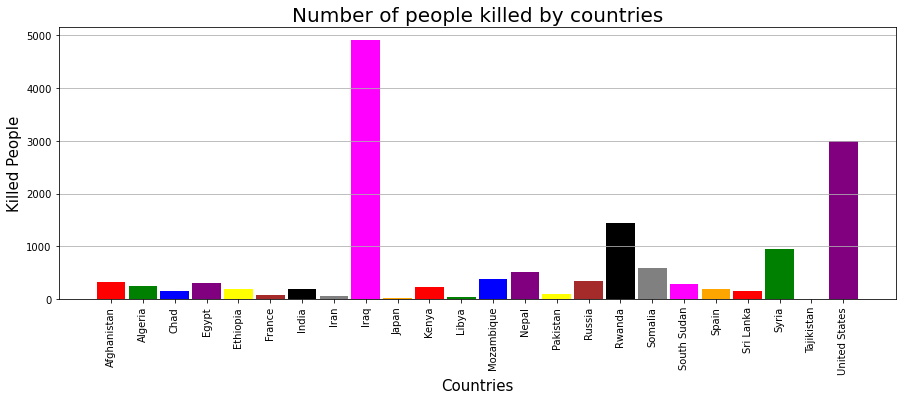

In [43]:
labels = set2_Format.columns.tolist()
labels = labels[:]
index = np.arange(len(labels))
transpoze = set2_Format.T
values = transpoze.values.tolist()
values = values[:]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig,ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=15
fig_size[1]=5
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xlabel('Countries', fontsize = 15)
plt.xticks (index, labels, fontsize= 10, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

## CONCLUSION

#### There have been deadly outcomes associated with terrorist acts throughout the Middle East and northern Africa. Significant terrorist attacks are thought to have occurred in the Middle East and North Africa. Also, despite the misconception that Muslims support terrorism, Muslims are the group most negatively impacted by terrorist strikes. Iraq, Afghanistan, and Pakistan seem to have suffered the most damage from the graphics. These are all Muslim-majority nations.